# Hypothesis Testing using Chi Square Test 

Hypothesis test relationships between different kinds of variables (quantitative and categorical). 
In the context of Chisquare test is used when we we have two categorical variables.

In [ ]:
Dataset:
    'data.csv' includes lastest edition FIFA 2019 players attributes like Age, Nationality, Overall, Potential, Club, Value, Wage, 
Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, 
Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, 
RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy,
LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, 
LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, 
GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.

Url for data set :https://www.kaggle.com/karangadiya/fifa19

In [1]:
# import necessary libraries

import pandas as pd
import numpy
import scipy.stats
import seaborn
import matplotlib.pyplot as plt

In [2]:
# Read the Dataset

df = pd.read_csv('data.csv')

In [3]:
# Examine the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [4]:
#Bining values for Age into a new variable, AgeRange 

bins = [15, 20, 30, 40, 50]
names = ['20', '30', '40']

df['AgeRange'] = pd.cut(df['Age'], bins, labels=['20','30','40', '45'])

In [ ]:
#Recoding Countires into a continents (esp Europe, Latin and Other)

In [5]:
# List of latin countries

Latin_coun = ['Brazil','Mexico','Colombia','Argentina','Peru','Venezuela', 'Chile','Guatemala','Ecuador','Cuba', 'Bolivia',
             'Haiti','Dominican Republic','Honduras','Paraguay','El Salvador','Nicaragua','Costa Rica','Panama','Puerto Rico',
              'Uruguay','Guadeloupe','Martinique','French Guiana','Saint Martin','Saint Barthélemy']


In [6]:
# List of European countries

Euro_coun = ['Belarus','Åland Islands','Albania','Austria','Bulgaria','Denmark','Andorra','Belgium','Czech Republic','Estonia','Bosnia and Herzegovina',
             'France','Republic of Moldova','Faroe Islands','Croatia','Germany','Poland','Finland','Gibraltar','Liechtenstein','Hungary',
             'Guernsey','Greece','Luxembourg','Romania','Iceland','Italy','Monaco','Russian Federation','Republic of Ireland','Republic of Macedonia',
             'Netherlands','Slovakia','Jersey','Malta','Switzerland','Ukraine','Isle of Man','Montenegro','Latvia','Portugal','Lithuania',
             'San Marino','Norway','Serbia','Sark','Slovenia','Svalbard and Jan Mayen','Spain','Sweden','Vatican City','United Kingdom']

In [7]:
#Mapper Function for mapping each country to its respective Continent

def GetConti(x):
    if x in Euro_coun:
        return "Europe"
    elif x in Latin_coun:
        return "Latin"
    else:
        return "other"

df['Continent'] = df['Nationality'].apply(lambda x: GetConti(x))

# print to rechek
print(df)

       Unnamed: 0      ID                  Name  Age  \
0               0  158023              L. Messi   31   
1               1   20801     Cristiano Ronaldo   33   
2               2  190871             Neymar Jr   26   
3               3  193080                De Gea   27   
4               4  192985          K. De Bruyne   27   
5               5  183277             E. Hazard   27   
6               6  177003             L. Modrić   32   
7               7  176580             L. Suárez   31   
8               8  155862          Sergio Ramos   32   
9               9  200389              J. Oblak   25   
10             10  188545        R. Lewandowski   29   
11             11  182521              T. Kroos   28   
12             12  182493              D. Godín   32   
13             13  168542           David Silva   32   
14             14  215914              N. Kanté   27   
15             15  211110             P. Dybala   24   
16             16  202126               H. Kane 

In [8]:
#Subset data of players with just Europe and Latin Continents

sub1 = df[df['Continent']!='other']

In [9]:
# Making a copy of new subset
sub2 = sub1.copy()

In [10]:
#recoding values for Latin and Europe Continents

recode1 = {'Latin': 0, 'Europe': 1}
sub2['Continent_recoded']= sub2['Continent'].map(recode1)

In [11]:
# contingency table of observed counts
ct1=pd.crosstab(sub2['Continent_recoded'],sub2['AgeRange'])
print (ct1)

# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

AgeRange             20    30    40  45
Continent_recoded                      
0                   501  2479   655   3
1                  1622  5526  1069   1
AgeRange                 20        30       40    45
Continent_recoded                                   
0                  0.235987  0.309681  0.37993  0.75
1                  0.764013  0.690319  0.62007  0.25


In [12]:
# chi-square for whole subset
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print(cs1)

chi-square value, p value, expected counts
(97.40810363316996, 5.6069728061109156e-21, 3, array([[6.51440115e+02, 2.45632507e+03, 5.29007422e+02, 1.22739541e+00],
       [1.47155989e+03, 5.54867493e+03, 1.19499258e+03, 2.77260459e+00]]))


Text(6.799999999999997, 0.5, 'Proportion Distribution')

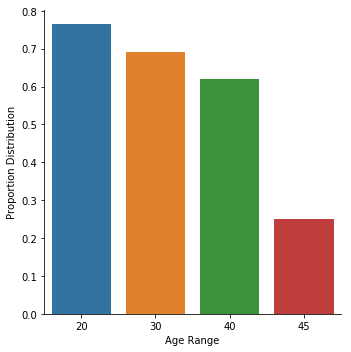

In [13]:
# graph percent with players from Age frequency group 
seaborn.catplot(x="AgeRange", y="Continent_recoded", data=sub2, kind="bar", ci=None)
plt.xlabel('Age Range')
plt.ylabel('Proportion Distribution')

Posthoc Analysis
Bonferroni Adjustment to control the binwise error rate, also known as the maximum overall type 1 error rate. So that we can evaluate which pairs of Age bins are different from one another.

Determining which Age bins are different from the others. 
Perform comparisons for each pair of Continent players across the 4 Age bin categories

In [ ]:
Bonferroni Adjustment = p/c

p=0.05
c = number of comparsions

For a 6 paired comparision we get 
Adjusted p value of = 0.05/6 = 0.00833

In [14]:
recode2 = {'20': 20, '30': 30}
sub2['COMP1v2']= sub2['AgeRange'].map(recode2)

# contingency table of observed counts
ct2=pd.crosstab(sub2['Continent_recoded'], sub2['COMP1v2'])
print (ct2)

# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

COMP1v2            20.0  30.0
Continent_recoded            
0                   501  2479
1                  1622  5526
COMP1v2                20.0      30.0
Continent_recoded                    
0                  0.235987  0.309681
1                  0.764013  0.690319
chi-square value, p value, expected counts
(43.52981529827904, 4.175488880419058e-11, 1, array([[ 624.65837283, 2355.34162717],
       [1498.34162717, 5649.65837283]]))


In [15]:
recode3 = {'20': 20, '40': 40}
sub2['COMP1v3']= sub2['AgeRange'].map(recode3)

# contingency table of observed counts
ct3=pd.crosstab(sub2['Continent_recoded'], sub2['COMP1v3'])
print (ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs3 = scipy.stats.chi2_contingency(ct2)
print (cs3)

COMP1v3            20.0  40.0
Continent_recoded            
0                   501   655
1                  1622  1069
COMP1v3                20.0     40.0
Continent_recoded                   
0                  0.235987  0.37993
1                  0.764013  0.62007
chi-square value, p value, expected counts
(43.52981529827904, 4.175488880419058e-11, 1, array([[ 624.65837283, 2355.34162717],
       [1498.34162717, 5649.65837283]]))


In [16]:
recode4 = {'20': 20, '40': 40}
sub2['COMP1v4']= sub2['AgeRange'].map(recode4)

# contingency table of observed counts
ct2=pd.crosstab(sub2['Continent_recoded'], sub2['COMP1v4'])
print (ct2)

# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

COMP1v4            20.0  40.0
Continent_recoded            
0                   501   655
1                  1622  1069
COMP1v4                20.0     40.0
Continent_recoded                   
0                  0.235987  0.37993
1                  0.764013  0.62007
chi-square value, p value, expected counts
(93.09910422589414, 4.974024539528955e-22, 1, array([[ 637.94853132,  518.05146868],
       [1485.05146868, 1205.94853132]]))


In [17]:
recode5 = {'20': 20, '50': 50}
sub2['COMP1v5']= sub2['AgeRange'].map(recode5)

# contingency table of observed counts
ct3=pd.crosstab(sub2['Continent_recoded'], sub2['COMP1v5'])
print (ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs3 = scipy.stats.chi2_contingency(ct2)
print (cs3)

COMP1v5            20.0
Continent_recoded      
0                   501
1                  1622
COMP1v5                20.0
Continent_recoded          
0                  0.235987
1                  0.764013
chi-square value, p value, expected counts
(93.09910422589414, 4.974024539528955e-22, 1, array([[ 637.94853132,  518.05146868],
       [1485.05146868, 1205.94853132]]))


In [18]:
recode6 = {'30': 30, '40': 40}
sub2['COMP1v6']= sub2['AgeRange'].map(recode6)

# contingency table of observed counts
ct3=pd.crosstab(sub2['Continent_recoded'], sub2['COMP1v6'])
print (ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs3 = scipy.stats.chi2_contingency(ct2)
print (cs3)

COMP1v6            30.0  40.0
Continent_recoded            
0                  2479   655
1                  5526  1069
COMP1v6                30.0     40.0
Continent_recoded                   
0                  0.309681  0.37993
1                  0.690319  0.62007
chi-square value, p value, expected counts
(93.09910422589414, 4.974024539528955e-22, 1, array([[ 637.94853132,  518.05146868],
       [1485.05146868, 1205.94853132]]))


In [19]:
recode7 = {'30': 30, '50': 50}
sub2['COMP1v7']= sub2['AgeRange'].map(recode6)

# contingency table of observed counts
ct3=pd.crosstab(sub2['Continent_recoded'], sub2['COMP1v7'])
print (ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs3 = scipy.stats.chi2_contingency(ct2)
print (cs3)

COMP1v7            30.0  40.0
Continent_recoded            
0                  2479   655
1                  5526  1069
COMP1v7                30.0     40.0
Continent_recoded                   
0                  0.309681  0.37993
1                  0.690319  0.62007
chi-square value, p value, expected counts
(93.09910422589414, 4.974024539528955e-22, 1, array([[ 637.94853132,  518.05146868],
       [1485.05146868, 1205.94853132]]))


In [20]:
recode8 = {'40': 40, '50': 50}
sub2['COMP1v6']= sub2['AgeRange'].map(recode6)

# contingency table of observed counts
ct3=pd.crosstab(sub2['Continent_recoded'], sub2['COMP1v6'])
print (ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs3 = scipy.stats.chi2_contingency(ct2)
print (cs3)

COMP1v6            30.0  40.0
Continent_recoded            
0                  2479   655
1                  5526  1069
COMP1v6                30.0     40.0
Continent_recoded                   
0                  0.309681  0.37993
1                  0.690319  0.62007
chi-square value, p value, expected counts
(93.09910422589414, 4.974024539528955e-22, 1, array([[ 637.94853132,  518.05146868],
       [1485.05146868, 1205.94853132]]))


Chisquare table for each of the paired comparisions.

	20	30	40	50
20	*	*	*	*
30	4.18E-11	*	*	*
40	4.97E-22	4.97E-22	*	*
50	4.97E-22	4.97E-22	4.97E-22	*
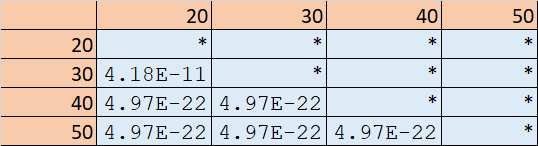

All the comparisions are less than Adjusted p of 0.00833,
hence all age groups are not significantly different from each of the other continnent players.

Citation: 
    Based on course @ https://www.coursera.org/learn/data-analysis-tools/home/week/2